# Homework 1

### Deadline: Wednesday 19 March 2024 (by 19h00)

### Credits: 20 points

### Instructions:

- When you finish, please submit a single **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The homework is individual. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems.

# Name: Silva Alejandro

## 1. Thermodynamics of ideal and real gases (10 points)

The equation of state (EOS) for ideal gases is given by:

$$P\,V = n\,R\,T$$

where:
- $P$ is the pressure,
- $V$ is the volume,
- $T$ is the temperature,
- $R = 0.08206\,\rm L\,atm/(mol\,K)$ is the ideal gas constant,
- $n$ is the number of moles.

On the other hand, real gases can be modeled with the van der Waals equation (EOS):

$$\left(P + \frac{n^2 a}{V^2}\right)(V - n\,b) = n\,R\,T$$

where $a$ and $b$ are constants that depend on the gas composition. The table below shows typical values of these constants for 6 gases:

| Gas             | $a\,\rm (L^2\,atm/mol^2)$ | $b\,\rm (L/mol)$ |
|-----------------|---------------------|-----------------|
| Hydrogen ($\rm H_2$)   | 0.248               | 0.0266          |
| Nitrogen ($\rm N_2$)   | 1.370               | 0.0387          |
| Oxygen ($\rm O_2$)     | 1.382               | 0.0319          |
| Chlorine ($\rm Cl_2$)  | 6.579               | 0.0562          |
| Carbon Dioxide ($\rm CO_2$) | 3.592          | 0.0427          |
| Methane ($\rm C\,H_4$)   | 2.253             | 0.0428          |


##### Reference: https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)


### Coding tasks:

In [1]:
#Import useful libraries
import numpy as np
import matplotlib.pyplot as plt

#### (a) Create a python function that reads $n$, $T$, $V$, $a$, $b$ and returns a two-element tuple with the thermal pressures $P$, calculated with the ideal gas equation and the van der Waals equation.

In [2]:
def calculate_pressure(V, n, T, a, b):
  """
  This function returns a two-element tuple with the thermal pressures calculated using the ideal gas equation and
  the Van der Waals equation.
  Inputs: n (float, is the number of moles), T (float, is the temperature in K), V (array, is the volume in L), \
  a (float, constant that depends on gas composition in L^2 atm/ mol^2),  b (float, constant that depends on gas composition in L/mol),\
  R(ideal gas constant, in L atm/mol K)

  Outputs: p_tuple (two element tuple with p_ideal and p_real, the units of both are atm)

  Algoritm:
    Create an empty list
    Compute p_ideal using the equation for ideal gases
    Store p_ideal in the empty list
    Compute p_real using the Van der Waals equation
    Store p_real in the list
    Unpack the list to a tuple
    Return the tuple

  Author: AlejoS
  Date modified: 11/03/2025
  """
  R = 0.08206 #[L atm/mol K] define the ideal gas constant
  p_list = []
    
  p_ideal = n*R*T/V
  p_list.append(p_ideal)
    
  p_real = n*R*T/(V-n*b) - n**2*a/V**2
  p_list.append(p_real)

  (p_i, p_r) = p_list
  p_tuple = (p_i, p_r)

  return p_tuple

#### (b) Define a python dictionary containing the identifiers of all 6 gases as "keys" with their respective $a$ and $b$ constants as elements.

In [3]:
gas_composition_constants = {}
gas_composition_constants.update({"H2": (0.248, 0.0266), "N2":(1.370, 0.0387) , "O2":(1.382, 0.0319),\
                                  "Cl2":(6.579, 0.0562), "CO2":(3.592, 0.0427), "CH4":(2.253, 0.0428)}) #a first element, b second element

I saved the constants inside a tuple for each gas. Maybe a list would be better?

In [4]:
#Safe check
#gas_composition_constants.keys()
#print(gas_composition_constants)

#### (c) Generate a 1D volume vector covering the range from $0.5$ to $5\,\rm L$, and fix the number of moles at $n=1\,\rm mol$ and the temperature of the gas at $T=298\,\rm K$.

In [5]:
n_1 = 1 #fix the number of moles
T_1 = 298 #fix the temperature of the gas

V_1 = np.linspace(0.5, 1., 100) #the range was reduced to better visualize the differences between both EOS when plotting

#### (d) Using the values of $a$ and $b$ from the dictionary in point (b), and the inputs in defined (c), call the function created in point (a) to obtain a set of pressure arrays, $P$, with both equations of state for each gas. (**Hint:** a for loop can help access the dictionary elements).

In [6]:
list_pressures = [] #create an empty list to store the calculated pressures
for constant in gas_composition_constants.values(): #iterate over the values for a,b for each element, in order as shown in the table
    p_tuple = calculate_pressure(V_1, n_1, T_1, constant[0], constant[1]) #calculate the pressure using both EOS for each element
    list_pressures.append(p_tuple) #store the calculated pressures on the list

p_array_1 = np.array(list_pressures) #convert to an array
#p_array = p_array_1.flatten()
  
#Safe check
#print(p_array_1)
# print(type(p_array))
# print(p_array.shape)
#print(p_array)

#### (e) Use matplotlib to make a high-quality, labeled, multi-panel figure of the thermal pressure (calculated with both EOS) of all 6 gases as a function of volume. The plot should have $P$ on the Y axis and $V$ on the X axis.

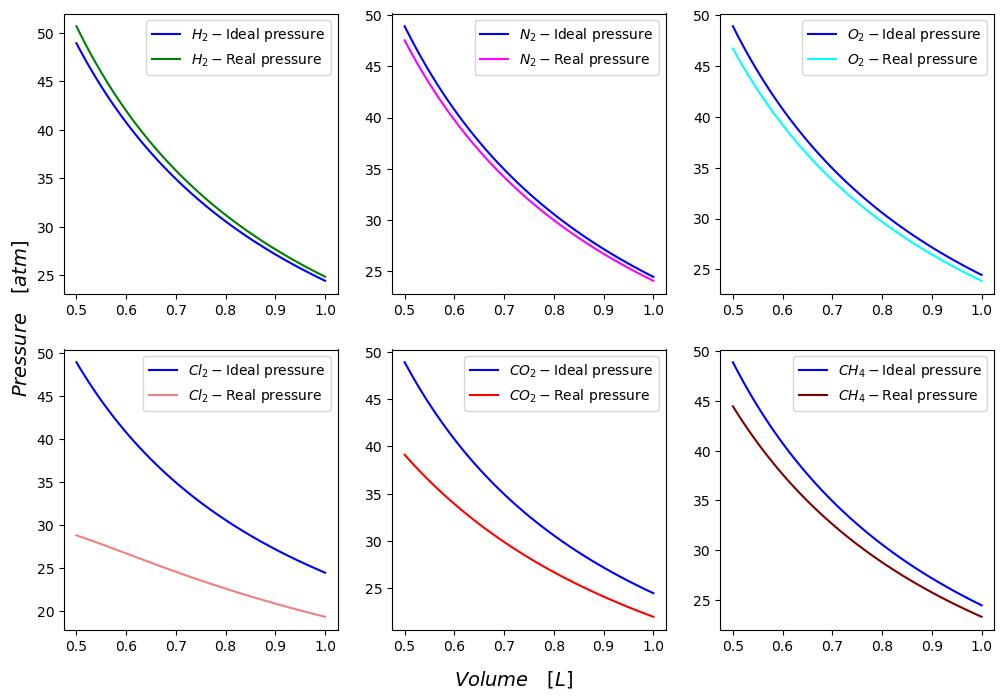

In [7]:
#Subplots environment
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 8))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten() 

ax1.plot(V_1, p_array_1[0,0], color = "blue", label = r"$H_{2}-\text{Ideal pressure}$")
ax1.plot(V_1, p_array_1[0,1], color = "green", label = r"$H_{2}-\text{Real pressure}$")
ax1.legend()
ax2.plot(V_1, p_array_1[1,0], color = "blue", label = r"$N_{2}-\text{Ideal pressure}$")
ax2.plot(V_1, p_array_1[1,1], color = "magenta", label = r"$N_{2}-\text{Real pressure}$")
ax2.legend()
ax3.plot(V_1, p_array_1[2,0], color = "blue", label = r"$O_{2}-\text{Ideal pressure}$")
ax3.plot(V_1, p_array_1[2,1], color = "cyan", label = r"$O_{2}-\text{Real pressure}$")
ax3.legend()
ax4.plot(V_1, p_array_1[3,0], color = "blue", label = r"$Cl_{2}-\text{Ideal pressure}$")
ax4.plot(V_1, p_array_1[3,1], color = "lightcoral", label = r"$Cl_{2}-\text{Real pressure}$")
ax4.legend()
ax5.plot(V_1, p_array_1[4,0], color = "blue", label = r"$CO_{2}-\text{Ideal pressure}$")
ax5.plot(V_1, p_array_1[4,1], color = "red", label = r"$CO_{2}-\text{Real pressure}$")
ax5.legend()
ax6.plot(V_1, p_array_1[5,0], color = "blue", label = r"$CH_{4}-\text{Ideal pressure}$")
ax6.plot(V_1, p_array_1[5,1], color = "maroon", label = r"$CH_{4}-\text{Real pressure}$")
ax6.legend()

fig.text(0.5, 0.04, r"$Volume \quad [L]$", ha='center', fontsize=14)
fig.text(0.08, 0.5, r"$Pressure \quad [atm]$", va='center', rotation='vertical', fontsize=14) #use shared axis titles

plt.show()
plt.close()

#### (f) Now, we want to represent the gas temperature surfaces on the PV plane. Create a new python function that reads $n$, $P$, $V$, $a$, $b$ and returns a two-element tuple with the temperatures $T$, calculated with the ideal gas equation and the van der Waals equation.

In [8]:
def calculate_temperature(V, P, n, a, b):
    """
  This function returns a two-element tuple with the gas temperatures calculated using the ideal gas equation and
  the Van der Waals equation.
  Inputs: n (float, is the number of moles), P (array, is the temperature in atm), V (array, is the volume in L), \
  a (float, constant dependent on gas composition in L^2 atm/ mol^2),  b (float, constant dependent on gas composition in L/mol),\
  R(ideal gas constant, in L atm/mol K)

  Outputs: t_tuple (two element tuple with t_ideal and t_real, the units of both are K)

  Algoritm:
    Create an empty list
    Compute t_ideal using the equation for ideal gases
    Store t_ideal in the empty list
    Compute t_real using the Van der Waals equation
    Store t_real in the list
    Unpack the list to a tuple
    Return the tuple

  Author: AlejoS
  Date modified: 12/03/2025
  """
    R = 0.08206 #[L atm/mol K]
    t_list = []
    
    t_ideal = P*V/n*R
    t_list.append(t_ideal)
    
    t_real = (V-n*b)*(P + n**2*a/V**2)/n*R
    t_list.append(t_real)

    (t_i, t_r) = t_list
    t_tuple = (t_i, t_r)

    return t_tuple

#### (g) Create a 2D pressure-volume (PV) meshgrid using appropriate vectors for thermal pressures and volumes.

In [9]:
P_1 = np.arange(0.5, 60., 0.01)
#For the V vector, we are going to use the one we already generated.
V_2D, P_2D = np.meshgrid(V_1, P_1)

#print(V_2D.shape, P_2D.shape)

#### (h) Use matplotlib to make two high-quality, labeled, multi-panel figures of the 2D temperatures (calculated with both EOS) of all 6 gases as a function of volume. The first figure should show 3D visualisations of the temperature surface. The second figure should show 2D projections of the temperature surface onto the PV plane. All the plots should have $P$ on the Y axis, $V$ on the X axis, and $T$ on the Z axis. 


First, we calculate the temperatures using the function created before.

In [10]:
list_temperatures = [] #define an empty list to store the calculated temperatures
for constant in gas_composition_constants.values(): #iterate over the values for a,b for each element, in order as shown in the table
    t_tuple = calculate_temperature(V_2D, P_2D, n_1, constant[0], constant[1]) #calculate the temperature using both EOS for each element
    list_temperatures.append(t_tuple) #store the calculated temperatures inside the list 

t_array_1 = np.array(list_temperatures) #convert to array

In [11]:
#print(t_array_1.shape)
#print(t_array_1)

We can access the temperatures by indexing. I first identified the ideal temperature array for each element (which is the same), and thus the next array is the real temperature array.

* For the 3D plots, there are two temperature surfaces per gas, one calculated with the ideal and the other using the real gas equation. Thus, the first multipanel figure has six elements.
* For the projections we also need six subplots, but each one should show the two calculated temperatures. This is the second multipanel figure.


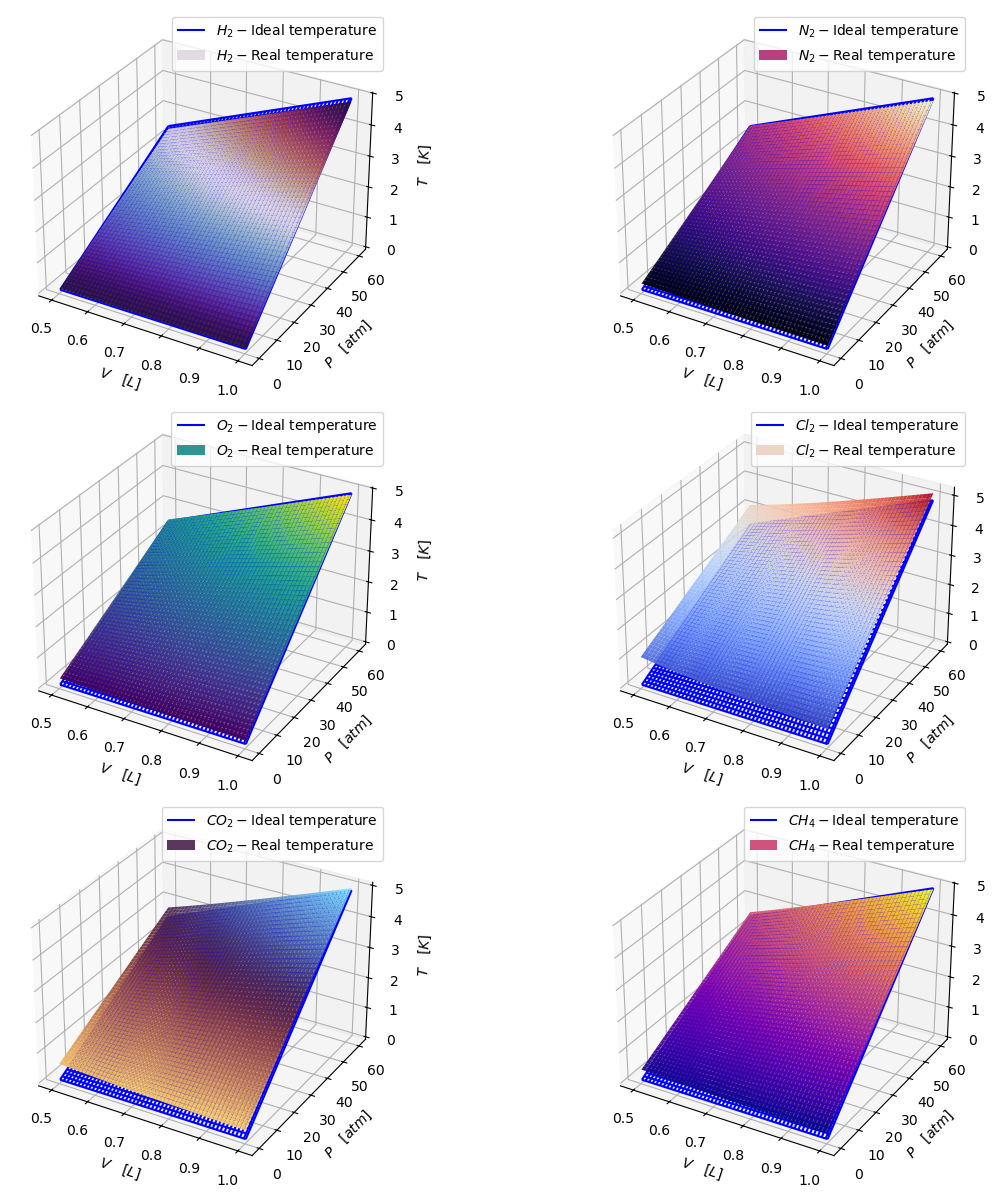

In [12]:
# Temperature surfaces multi-panel figure
fig = plt.figure(figsize=(14, 12))

ax1 = fig.add_subplot(3, 2, 1, projection='3d')
ax1.plot_wireframe(V_2D, P_2D, t_array_1[0,0,:], color = 'blue', linewidth=1.5, label = r"$H_{2}-\text{Ideal temperature}$")
ax1.plot_surface(V_2D, P_2D, t_array_1[0,1,:], cmap = 'twilight_shifted', alpha=0.95, label = r"$H_{2}-\text{Real temperature}$")
ax1.legend()

ax2 = fig.add_subplot(3, 2, 2, projection='3d')
ax2.plot_wireframe(V_2D, P_2D, t_array_1[1,0,:], color = 'blue', linewidth=1.5, label = r"$N_{2}-\text{Ideal temperature}$")
ax2.plot_surface(V_2D, P_2D,t_array_1[1,1,:], cmap = 'magma', alpha=0.95, label = r"$N_{2}-\text{Real temperature}$")
ax2.legend()

ax3 = fig.add_subplot(3, 2, 3, projection='3d')
ax3.plot_wireframe(V_2D, P_2D, t_array_1[2,0,:], color = 'blue', linewidth=1.5, label = r"$O_{2}-\text{Ideal temperature}$")
ax3.plot_surface(V_2D, P_2D,t_array_1[2,1,:], cmap = 'viridis', alpha=0.95,  label = r"$O_{2}-\text{Real temperature}$")
ax3.legend()

ax4 = fig.add_subplot(3, 2, 4, projection='3d')
ax4.plot_wireframe(V_2D, P_2D, t_array_1[3,0,:], color = 'blue', linewidth=1.5, label = r"$Cl_{2}-\text{Ideal temperature}$")
ax4.plot_surface(V_2D, P_2D,t_array_1[3,1,:], cmap = 'coolwarm', alpha=0.95, label = r"$Cl_{2}-\text{Real temperature}$") 
ax4.legend()

ax5 = fig.add_subplot(3, 2, 5, projection='3d')
ax5.plot_wireframe(V_2D, P_2D, t_array_1[4,0,:], color = 'blue', linewidth=1.5, label = r"$CO_{2}-\text{Ideal temperature}$")
ax5.plot_surface(V_2D, P_2D,t_array_1[4,1,:], cmap = 'managua', alpha=0.95, label = r"$CO_{2}-\text{Real temperature}$")
ax5.legend()

ax6 = fig.add_subplot(3, 2, 6, projection='3d')
ax6.plot_wireframe(V_2D, P_2D, t_array_1[5,0,:], color = 'blue', linewidth=1.5, label = r"$CH_{4}-\text{Ideal temperature}$")
ax6.plot_surface(V_2D, P_2D,t_array_1[5,1,:], cmap = 'plasma', alpha=0.95, label = r"$CH_{4}-\text{Real temperature}$")
ax6.legend()

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]: #use shared axis titles
    ax.set_xlabel(r"$V \quad [L]$")
    ax.set_ylabel(r"$P \quad [atm]$")
    ax.set_zlabel(r"$T \quad [K]$")

plt.tight_layout()  
plt.show()
plt.close()

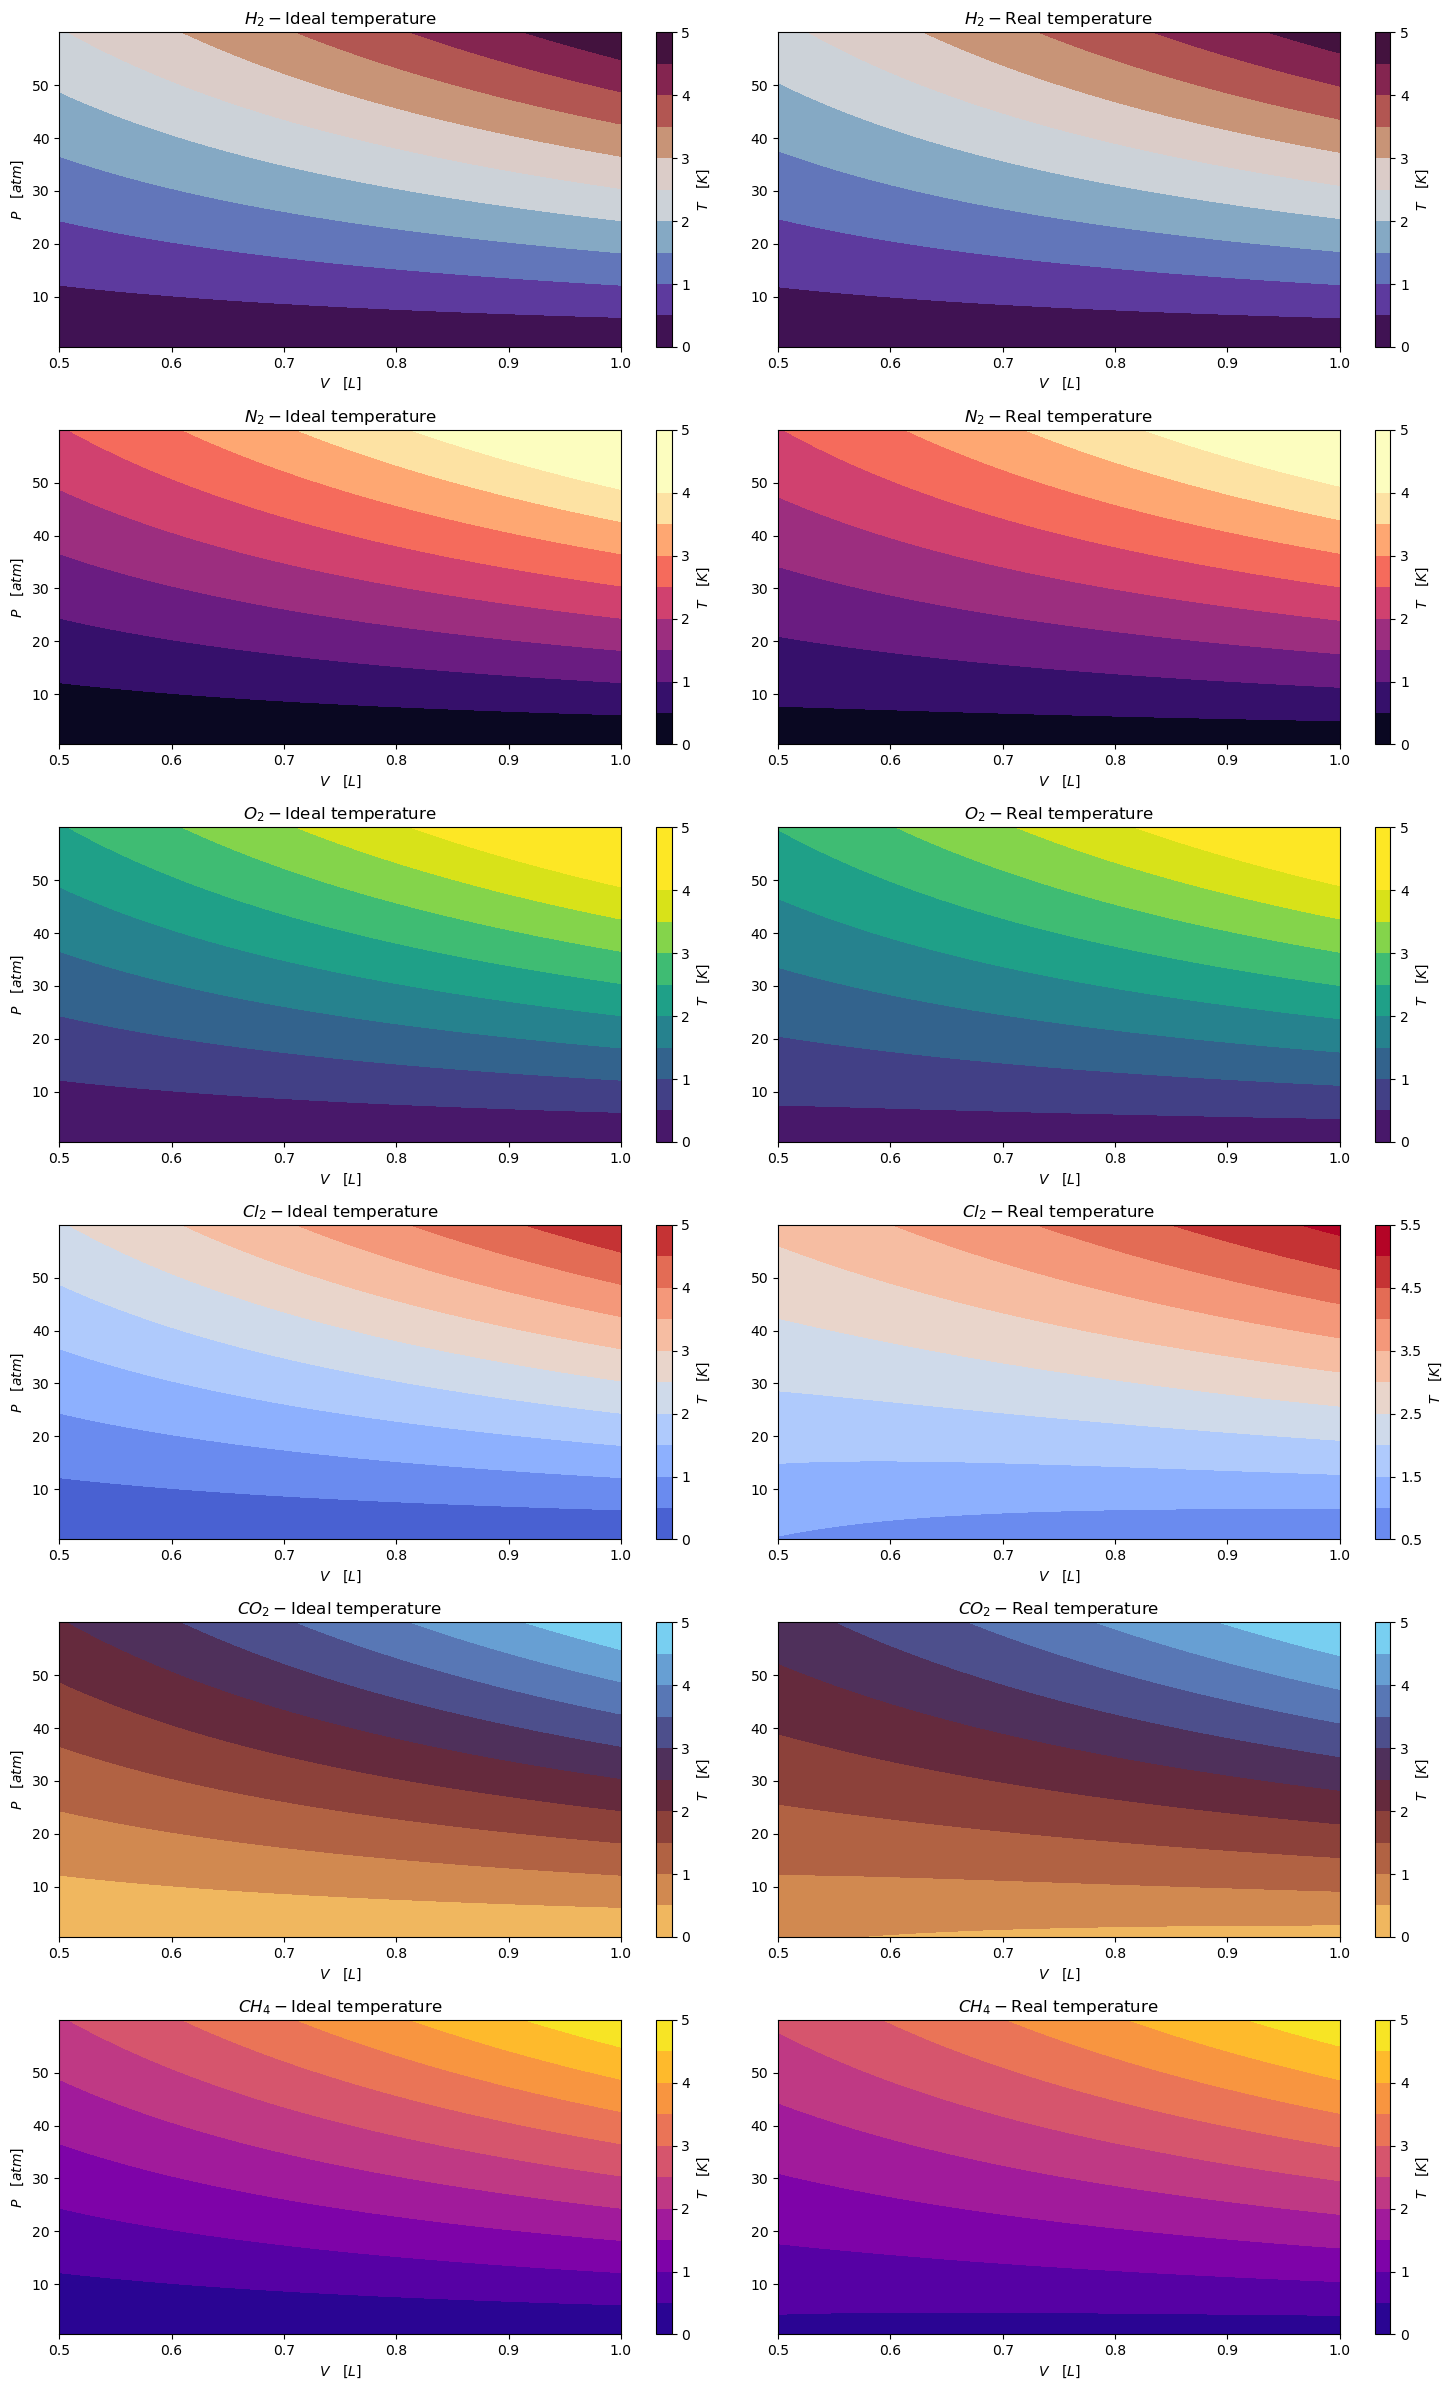

In [13]:
#Temperature projections multi-panel figure
fig, ax = plt.subplots(nrows = 6, ncols = 2, figsize = (15, 24))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12 = ax.flatten() 

t_h2_i = ax1.contourf(V_2D, P_2D, t_array_1[0,0,:], cmap ="twilight_shifted", levels = 9, vmin=0, vmax=5)
fig.colorbar(t_h2_i, ax = ax1).set_label(r"$T \quad [K]$")
ax1.set_title(r"$H_{2}-\text{Ideal temperature}$")
ax1.set_xlabel(r"$V \quad [L]$")
ax1.set_ylabel(r"$P \quad [atm]$")
t_h2_r = ax2.contourf(V_2D, P_2D, t_array_1[0,1,:], cmap ="twilight_shifted", levels = 9, vmin=0, vmax=5)
fig.colorbar(t_h2_r, ax = ax2).set_label(r"$T \quad [K]$")
ax2.set_title(r"$H_{2}-\text{Real temperature}$")
ax2.set_xlabel(r"$V \quad [L]$")

t_n2_i = ax3.contourf(V_2D, P_2D, t_array_1[1,0,:], cmap ="magma", levels = 9, vmin=0, vmax=4)
fig.colorbar(t_n2_i, ax = ax3).set_label(r"$T \quad [K]$")
ax3.set_title(r"$N_{2}-\text{Ideal temperature}$")
ax3.set_xlabel(r"$V \quad [L]$")
ax3.set_ylabel(r"$P \quad [atm]$")
t_n2_r = ax4.contourf(V_2D, P_2D, t_array_1[1,1,:], cmap ="magma", levels = 9, vmin=0, vmax=4)
fig.colorbar(t_n2_r, ax = ax4).set_label(r"$T \quad [K]$")
ax4.set_title(r"$N_{2}-\text{Real temperature}$")
ax4.set_xlabel(r"$V \quad [L]$")

t_o2_i = ax5.contourf(V_2D, P_2D, t_array_1[2,0,:], cmap ="viridis", levels = 9, vmin=0, vmax=4)
fig.colorbar(t_o2_i, ax = ax5).set_label(r"$T \quad [K]$")
ax5.set_title(r"$O_{2}-\text{Ideal temperature}$")
ax5.set_xlabel(r"$V \quad [L]$")
ax5.set_ylabel(r"$P \quad [atm]$")
t_o2_r = ax6.contourf(V_2D, P_2D, t_array_1[2,1,:], cmap ="viridis", levels = 9, vmin=0, vmax=4)
fig.colorbar(t_o2_r, ax = ax6).set_label(r"$T \quad [K]$")
ax6.set_title(r"$O_{2}-\text{Real temperature}$")
ax6.set_xlabel(r"$V \quad [L]$")

t_cl2_i = ax7.contourf(V_2D, P_2D, t_array_1[3,0,:], cmap ="coolwarm", levels = 9, vmin=0, vmax=5)
fig.colorbar(t_cl2_i, ax = ax7).set_label(r"$T \quad [K]$")
ax7.set_title(r"$Cl_{2}-\text{Ideal temperature}$")
ax7.set_xlabel(r"$V \quad [L]$")
ax7.set_ylabel(r"$P \quad [atm]$")
t_cl2_r = ax8.contourf(V_2D, P_2D, t_array_1[3,1,:], cmap ="coolwarm", levels = 9, vmin=0, vmax=5)
fig.colorbar(t_cl2_r, ax = ax8).set_label(r"$T \quad [K]$")
ax8.set_title(r"$Cl_{2}-\text{Real temperature}$")
ax8.set_xlabel(r"$V \quad [L]$")

t_co2_i = ax9.contourf(V_2D, P_2D, t_array_1[4,0,:], cmap ="managua", levels = 9, vmin=0, vmax=5)
fig.colorbar(t_co2_i, ax = ax9).set_label(r"$T \quad [K]$")
ax9.set_title(r"$CO_{2}-\text{Ideal temperature}$")
ax9.set_xlabel(r"$V \quad [L]$")
ax9.set_ylabel(r"$P \quad [atm]$")
t_co2_r = ax10.contourf(V_2D, P_2D, t_array_1[4,1,:], cmap ="managua", levels = 9, vmin=0, vmax=5)
fig.colorbar(t_co2_r, ax = ax10).set_label(r"$T \quad [K]$")
ax10.set_title(r"$CO_{2}-\text{Real temperature}$")
ax10.set_xlabel(r"$V \quad [L]$")

t_ch4_i = ax11.contourf(V_2D, P_2D, t_array_1[5,0,:], cmap ="plasma", levels = 9, vmin=0, vmax=5)
fig.colorbar(t_ch4_i, ax = ax11).set_label(r"$T \quad [K]$")
ax11.set_title(r"$CH_{4}-\text{Ideal temperature}$")
ax11.set_xlabel(r"$V \quad [L]$")
ax11.set_ylabel(r"$P \quad [atm]$")
t_ch4_r = ax12.contourf(V_2D, P_2D, t_array_1[5,1,:], cmap ="plasma", levels = 9, vmin=0, vmax=5)
fig.colorbar(t_ch4_r, ax = ax12).set_label(r"$T \quad [K]$")
ax12.set_title(r"$CH_{4}-\text{Real temperature}$")
ax12.set_xlabel(r"$V \quad [L]$")

plt.tight_layout()
plt.show()
plt.close()

#I could use a for loop to maybe avoid this much code, but for now it's fine.

### Analysis questions:

#### (i) Briefly explain, what do the the $a$ and $b$ constants in the real gas EOS represent physically?
$a$ and $b$ have a effect of reducing the pressure the greater they are. They could be related with the strength of molecular attraction.

#### (j) Based on the figures you made, what differences do you see between ideal and real gases? When do they coincide or differ?
From the 2D pressure plots and the 3D temperature plots, we see that at low Volume values, there is a noticeable mismatch between the calculations using the E.O.S for ideal and real gases.

## 2. Period of the tide using sea level data (10 points)

The goal of this exercise is to calculate the period of the sea level change with the tide in Ecuador. For this, we are going to use sea level measurements from the data base of the University of Hawaii:

http://uhslc.soest.hawaii.edu/data/?fd

These data sets were collected from more than $500$ tide gauge stations across the globe.

##### Reference: Caldwell, P. C., M. A. Merrifield, P. R. Thompson (2015), Sea level measured by tide gauges from global oceans — the Joint Archive for Sea Level holdings (NCEI Accession 0019568), Version 5.5, NOAA National Centers for Environmental Information, Dataset, doi:10.7289/V5V40S7W.

### Coding tasks:

#### (a) Go to the website of the sea level database and search for measurements from Ecuador. Download the "Fast Delivery" "hourly" data for all three stations in Ecuador (Santa Cruz, Baltra, and La Libertad). Inspect the data file structure. These data sets are **csv** files with 5 columns each (year, month, day, hour, sea level). The units of the sea level data are $\rm mm$.

We check the data using the terminal.

In [14]:
!pwd

/home/prostofsound/jnotebooks/computational-physics-1/homework


In [15]:
%%bash
cd data
head baltra.csv

1985,3,25,15,1435
1985,3,25,16,1183
1985,3,25,17,1101
1985,3,25,18,1210
1985,3,25,19,1471
1985,3,25,20,1837
1985,3,25,21,2202
1985,3,25,22,2465
1985,3,25,23,2583
1985,3,26,0,2514


In [16]:
%%bash
cd data
head la_libertad.csv

1949,9,1,5,2481
1949,9,1,6,2268
1949,9,1,7,2024
1949,9,1,8,1841
1949,9,1,9,1719
1949,9,1,10,1719
1949,9,1,11,1841
1949,9,1,12,2054
1949,9,1,13,2329
1949,9,1,14,2542


In [17]:
%%bash
cd data
head santa_cruz.csv

1978,10,19,17,488
1978,10,19,18,675
1978,10,19,19,1043
1978,10,19,20,1454
1978,10,19,21,1850
1978,10,19,22,2102
1978,10,19,23,2168
1978,10,20,0,2039
1978,10,20,1,1763
1978,10,20,2,1397


We see that the files have no headers, and the values are indeed comma separeted. Also, we indeed have 5 columns.

#### (b) Create an I/O function that uses pandas to read in the data from these files and return the columns as numpy arrays. You will use the hour and sea level columns for the analysis below.

In [18]:
#Import more useful libraries
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt

In [19]:
def io_sealevel(filename):
    """
    This function reads a file with hourly information of the sea level (mm) registered by 3 stations in Ecuador: La Libertad, 
    Santa Cruz, Baltra. It returns the columns of the file as arrays.
    Inputs: filename (path to the file)
    Outputs: year_a, month_a, day_a, hour_a, slevel_a (arrays)

    Author: AlejoS
    Date modified: 13/03/2025
    """
    file_1 = pd.read_csv(filename, sep = ",", names = ["year", "month", "day", "hour", "slevel"]) #also add the column names
    #to later access them

    year = np.array(file_1["year"])
    month = np.array(file_1["month"])
    day = np.array(file_1["day"])
    hour = np.array(file_1["hour"])
    slevel = np.array(file_1["slevel"])

    return year, month, day, hour, slevel

In [20]:
path_baltra = "/home/prostofsound/jnotebooks/computational-physics-1/homework/data/baltra.csv"
_, _, _, hour_b, slevel_b = io_sealevel(path_baltra) #return just the hour and sea level arrays

#print(hour_b.shape)
#print(slevel_b.shape)
#print(type(hour_b))

In [21]:
path_la_libertad = "/home/prostofsound/jnotebooks/computational-physics-1/homework/data/la_libertad.csv"
_, _, _, hour_ll, slevel_ll = io_sealevel(path_la_libertad) #return just the hour and sea level arrays

#print(hour_ll.shape)
#print(slevel_ll.shape)
#print(type(hour_ll))

In [22]:
path_santa_cruz = "/home/prostofsound/jnotebooks/computational-physics-1/homework/data/santa_cruz.csv"
_, _, _, hour_sc, slevel_sc = io_sealevel(path_santa_cruz) #return just the hour and sea level arrays

#print(hour_sc.shape)
#print(slevel_sc.shape)
#print(type(hour_sc))

#### (c) Plot the sea level measurements against the hours for all stations for a first inspection. You will notice there are outliers. Outliers show up as negative values that occur when instruments fail or measurements are missing.

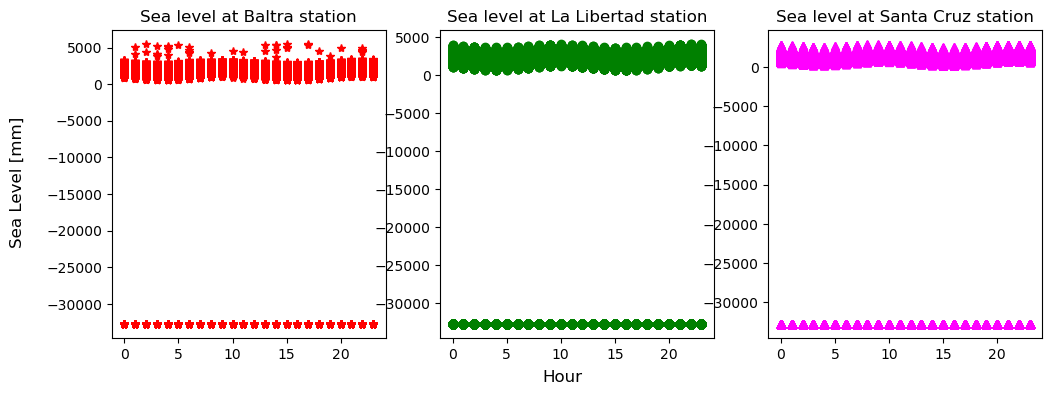

In [23]:
#First plotting attempt
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(12,4)) 
ax1, ax2, ax3 = ax.flatten()

ax1.plot(hour_b, slevel_b, color = "red", linestyle = "", marker = "*")
ax1.set_title("Sea level at Baltra station")

ax2.plot(hour_ll, slevel_ll, color = "green", linestyle = "", marker = "o")
ax2.set_title("Sea level at La Libertad station")

ax3.plot(hour_sc, slevel_sc, color = "magenta", linestyle = "", marker = "^")
ax3.set_title("Sea level at Santa Cruz station")

#Shared axis labels
fig.text(0.5, 0.0004, "Hour", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Sea Level [mm]", va="center", rotation="vertical", fontsize=12)

#plt.tight_layout()
plt.show()
plt.close()

#### (d) Create a clean-up function that removes extreme outliers from the data using indexing. Plot again the sea level measurements against the hours for all stations, but using the cleaned-up data wihtout outliers.

In [24]:
def clean_slevel(hour, slevel):
    """
    This functions cleans the outliers (negative values) from the data of sea level vs hours taken from the three stations.
    Inputs: hour (hours of the day, array), slevel (sea level measurements, array)
    Outputs: array_cleaned (array with the negative sea level mesurements cleaned,i.e, the negative values were erased from both slevel/
    and hour)

    Author: AlejoS
    Date modified: 18/03/2025
    """
    index = slevel[slevel > 0] #use positive values from slevel as our index
    slevel_cleaned = slevel[index] #check positive values in slvel
    hour_cleaned = hour[index] #check the corresponding hour values for the positive slevel values

    array_cleaned = np.array([hour_cleaned, slevel_cleaned]) #store both inside an array

    return array_cleaned

In [25]:
baltra_cleaned = clean_slevel(hour_b, slevel_b)
# print(type(baltra_cleaned))
# print(baltra_cleaned.shape)

In [26]:
la_libertad_cleaned = clean_slevel(hour_ll, slevel_ll)
# print(type(la_libertad_cleaned))
# print(la_libertad_cleaned.shape)

In [27]:
santa_cruz_cleaned = clean_slevel(hour_sc, slevel_sc)
# print(type(santa_cruz_cleaned))
# print(santa_cruz_cleaned.shape)

In [28]:
print(baltra_cleaned[0,:].size) #hours cleaned
print(baltra_cleaned[1,:].size) #slevel cleaned

315664
315664


Size is correct

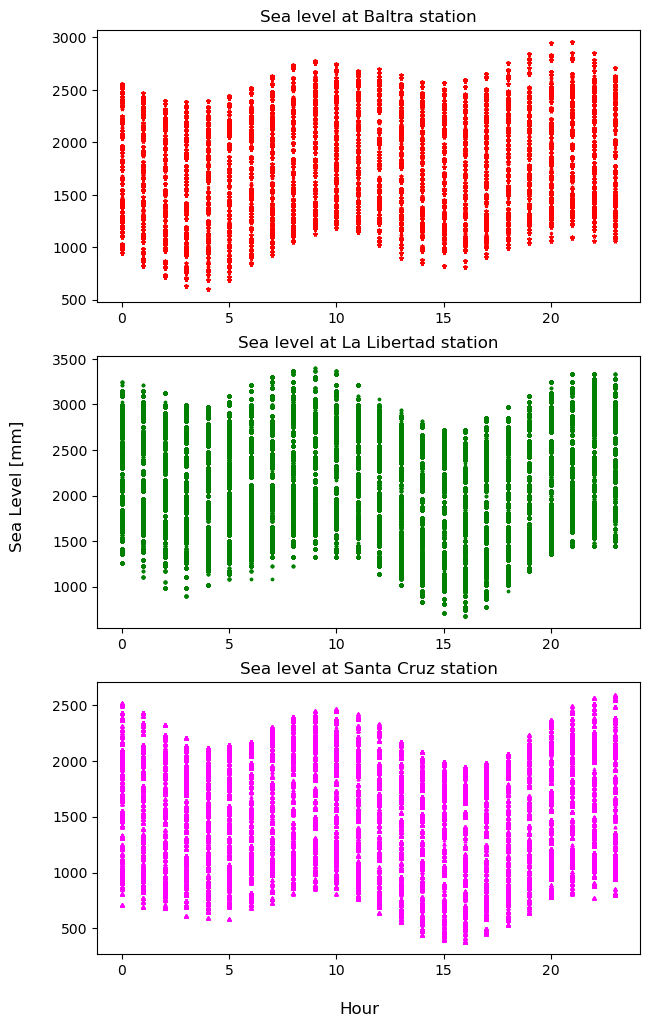

In [29]:
#Second plotting attempt, without the outliers
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(7,12)) 
ax1, ax2, ax3 = ax.flatten()

ax1.scatter(baltra_cleaned[0,:], baltra_cleaned[1,:], color = "red", marker = "*", s = 3)
ax1.set_title("Sea level at Baltra station")

ax2.scatter(la_libertad_cleaned[0,:],la_libertad_cleaned[1,:], color = "green", marker = "o", s = 3)
ax2.set_title("Sea level at La Libertad station")

ax3.scatter(santa_cruz_cleaned[0,:], santa_cruz_cleaned[1,:], color = "magenta", marker = "^", s = 3)
ax3.set_title("Sea level at Santa Cruz station")

#Shared axis labels
fig.text(0.5, 0.06, "Hour", ha="center", fontsize=12)
fig.text(0.0004, 0.5, "Sea Level [mm]", va="center", rotation="vertical", fontsize=12)

#plt.tight_layout()
plt.show()
plt.close()

#### (e) Calculate the average sea level at each hour for Santa Cruz and make a plot of average sea level against hours. Based on the observed trend, propose a model to describe the tide.

I need to find the mean and standard deviation of each of the 24 arrays.

The hours go from 0 to 23.

In [30]:
#Rename the hours and slevels cleaned arrays
sc_hours_cleaned = santa_cruz_cleaned[0,:]
sc_slevel_cleaned = santa_cruz_cleaned[1,:]

# print(sc_slevel_cleaned.size, sc_hours_cleaned.size)

In [31]:
av_slevel_hour_sc = []
stdv_slvel_hour_sc = []

for hour in range(24): #iterate over each hour
    index_average = (sc_hours_cleaned == hour) #collect all the measurements at each hour, this is our index
    avg_sc = np.mean(sc_slevel_cleaned[index_average]) #find the mean of all the measurements at each hour
    stdv_sc = np.std(sc_slevel_cleaned[index_average]) #find the standard deviation of all the measurements at each hour
    av_slevel_hour_sc.append(avg_sc) #store the means inside a list
    stdv_slvel_hour_sc.append(stdv_sc) #store the stdvs inside a list

av_slevel_hour_sc = np.array(av_slevel_hour_sc) #convert to an array
stdv_slvel_hour_sc = np.array(stdv_slvel_hour_sc) #convert to an array

# print(av_slevel_hour_sc.size)
# print(stdv_slvel_hour_sc.size)

In [32]:
hours_daily = np.unique(sc_hours_cleaned) #get the 24 hour values for plotting
print(hours_daily)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


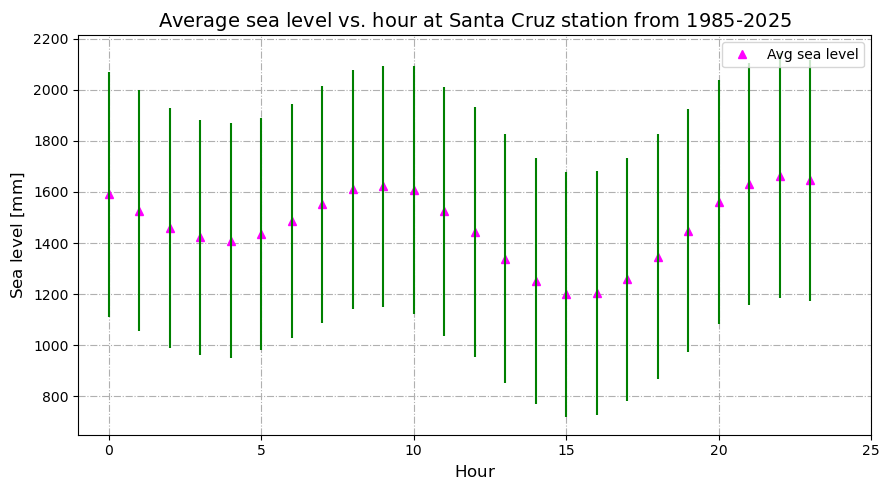

In [33]:
#Plotting the average sea level vs hour for Santa Cruz
plt.figure(figsize=(9, 5))

plt.plot(hours_daily, av_slevel_hour_sc, color="magenta", linestyle="", marker="^", label="Avg sea level")
plt.errorbar(hours_daily,  av_slevel_hour_sc, yerr = stdv_slvel_hour_sc, linestyle = " ", color = "green")


plt.title(r"$\text{Average sea level vs. hour at Santa Cruz station from 1985-2025}$", fontsize=14)
plt.xlabel(r"$\text{Hour}$", fontsize=12)
plt.ylabel(r"$\text{Sea level [mm]}$", fontsize=12)


plt.xlim(-1, 25)
plt.grid(linestyle = '-.')
plt.tight_layout()
plt.legend()

plt.show()
plt.close()


Let's propose a model. I think a fair attempt is a sinusoidal function.

In [34]:
def fit_slevel(hour, A_sc, B_sc, omega_sc_1, phi_sc_1, omega_sc_2, phi_sc_2, d_sc):
    """
    This function is a sum of two sinusoidal functions. It tries to model the tide at Santa Cruz.
    The independent factor d_sc is to displace the function along the y-axis.
    """
    
    slevel = A_sc*np.sin(omega_sc_1*hour + phi_sc_1) + B_sc*np.sin(omega_sc_2*hour + phi_sc_2) + d_sc
    
    return slevel

After trying with one sinusoidal function, it was best to use two functions instead. Also, the displacement parammeter is key.

#### (f) Fit your model to the data to study the hourly change of the sea level also known as the tide (if you use curvefit() for the regression, I suggest providing ansatz values). Report the best-fit function including uncertainties.

In [35]:
# Using the LM method (with sigmas and an ansatz)

coef_sc, cova_sc = opt.curve_fit(fit_slevel, hours_daily, av_slevel_hour_sc, \
                                p0 = [200., 150., 0.2*np.pi, 0.15*np.pi, 0., 0.2*np.pi, 10], sigma = stdv_slvel_hour_sc)
print("Best-fit parameters", coef_sc)

print("Associate uncertainties:", np.sqrt(np.diag(cova_sc)))

Best-fit parameters [ 1.64143241e+02 -1.07387784e+02  5.27564079e-01  2.77291573e+00
  2.71585620e-01  3.81066821e+00  1.46526686e+03]
Associate uncertainties: [2.01158032 1.46423399 0.00278326 0.04308856 0.00575349 0.09027146
 1.94878786]


The associated uncertainties are not that bad.

In [36]:
fitted_slevel = fit_slevel(hours_daily,*coef_sc) #evaluate the coefficients in our model

uncert_fit_sc = np.sqrt(np.diag(cova_sc))

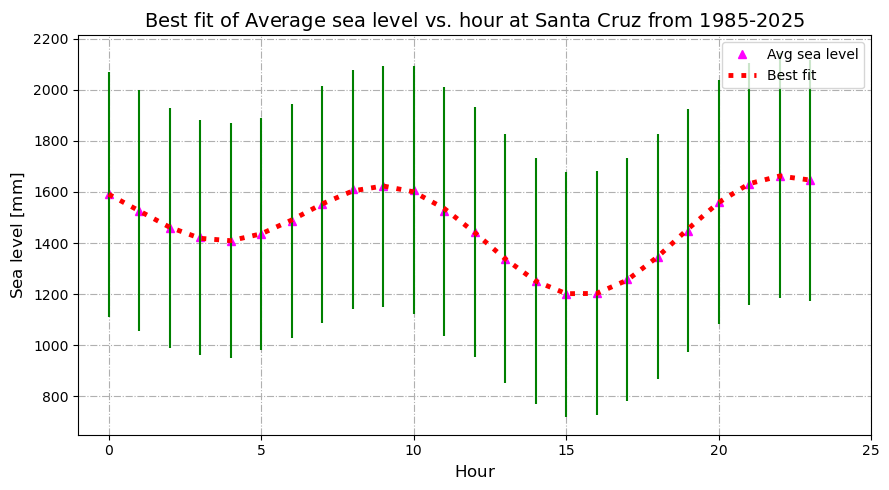

In [37]:
#Plot the fitting and the data
plt.figure(figsize=(9, 5))

plt.plot(hours_daily, av_slevel_hour_sc, color="magenta", linestyle="", marker="^", label="Avg sea level")
plt.errorbar(hours_daily,  av_slevel_hour_sc, yerr = stdv_slvel_hour_sc, linestyle = " ", color = "green")
plt.plot(hours_daily, fitted_slevel , color="red", linestyle = ":", linewidth = 3.5, label="Best fit") #add model as label


plt.title(r"$\text{Best fit of Average sea level vs. hour at Santa Cruz from 1985-2025}$", fontsize=14)
plt.xlabel(r"$\text{Hour}$", fontsize=12)
plt.ylabel(r"$\text{Sea level [mm]}$", fontsize=12)


plt.xlim(-1, 25)
plt.grid(linestyle = '-.')
plt.tight_layout()
plt.legend()

plt.show()
plt.close()

In [90]:
print(
    f"The best fit function is: "
    f"({coef_sc[0]:.4f} ± {uncert_fit_sc[0]:.4f}) * sin[({coef_sc[2]:.4f} ± {uncert_fit_sc[2]:.4f}) * t + ({coef_sc[3]:.4f} ± {uncert_fit_sc[3]:.4f})] + "
    f"({coef_sc[1]:.4f} ± {uncert_fit_sc[1]:.4f}) * sin[({coef_sc[4]:.4f} ± {uncert_fit_sc[4]:.4f}) * t + ({coef_sc[5]:.4f} ± {uncert_fit_sc[5]:.4f})] +"
    f"({coef_sc[6]:.4f} ± {uncert_fit_sc[6]:.4f})"
)
print("\n")
print(f"t is in units of hours.")

The best fit function is: (164.1432 ± 3.1830) * sin[(0.5276 ± 0.0044) * t + (2.7729 ± 0.0640)] + (-107.3878 ± 2.4694) * sin[(0.2716 ± 0.0083) * t + (3.8107 ± 0.1249)] +(1465.2669 ± 1.9178)


t is in units of hours.


#### (g) Carry out a goodness-of-fit test. For this you need a function that computes the global $\chi^2$ statistic, the number of degrees of freedom, and the reduced $\chi^2$ statistic. Use your function to evaluate your regression.

In [39]:
def chi_sqr_stat_slevel(free_param):
    """
    Using the proposed physical model, this function calculates the chi² statistic to carry out a goodness-of-fit test.
    Inputs: Free parammeters of the physical model
    Outputs: chi² stat, nu_sc (number of degrees of freedom), reduced chi²

    Author: AlejoS
    Date modified: 16/03/2025
    """
    A_sc, B_sc, omega_sc_1, phi_sc_1, omega_sc_2, phi_sc_2, d_sc = free_param 
    phys_model_slevel = fit_slevel(hour, A_sc, B_sc, omega_sc_1, phi_sc_1, omega_sc_2, phi_sc_2, d_sc)
    
    #Use the chi² statistic formula
    chi_sqr_stat = np.sum((av_slevel_hour_sc - phys_model_slevel)**2/(stdv_slvel_hour_sc)**2)

    #Calculate the number of degrees of freedom
    nu_sc = len(av_slevel_hour_sc) - len(coef_sc)

    #Calculate the reduced chi² statistic
    chi_sqr_red = chi_sqr_stat/nu_sc
    
    return chi_sqr_stat, nu_sc, chi_sqr_red

In [40]:
chi_stat_sc = chi_sqr_stat_slevel(coef_sc)

print(f"The chi-squared statistic is {chi_stat_sc[0]:.3f}.")
print("\n")
print(f"The number of degrees of freedom is {chi_stat_sc[1]}.")
print("\n")
print(f"The reduced chi-squared statistic is {chi_stat_sc[2]:.3f}.")

The chi-squared statistic is 5.431.


The number of degrees of freedom is 17.


The reduced chi-squared statistic is 0.319.


Maybe we need fewer free parammeters. But I think the fitting looks pretty good.

#### (h) Construct the confidence intervals and show them in 2D parameter space/s. For this you should evaluate the $\chi^2$ statistic in the vicinity of the best-fit values for the free parameters in your model. The confidence interval maps should have one free parameter in the X axis, another free parameter in the Y axis, and the projected $\chi^2$ hypersurface in the $Z$ axis. **Hints:** to create a 2D parameter space as a meshgrid, you should first create vectors with numbers around the best-fit values found in your regressions. 1D plots showing $\chi^2$ as a function of each free parameter may help identify optimal numbers.

Let's evaluate the $\chi²$ statistic in the vicinity of the best fit parammeters. My model has 7 free parammeters.

In [41]:
print(*coef_sc)

164.1432413857956 -107.38778392408773 0.5275640789434981 2.772915725105967 0.2715856198059458 3.8106682122852384 1465.2668576298083


In [42]:
chi_stat_sc_2 = chi_sqr_stat_slevel([170., -115., 0.6, 3., 0.3, 4., 1470.]) #we check above our best fit parammeters

print("The chi-squared statistic value up: ", chi_stat_sc_2[0])

chi_stat_sc_3 = chi_sqr_stat_slevel([155., -100., 0.3, 2.5, 0.2, 2.5, 1440.]) #we check down our best fit parammeters

print("The chi-squared statistic value down: ", chi_stat_sc_3[0])

The chi-squared statistic value up:  2.196473071669477
The chi-squared statistic value down:  3.0898618905958095


Let's generate the 1D vectors with numbers around the best-fit values.

**A_sc (first amplitude)**

In [43]:
A_sc_vector = np.linspace(100, 180, 1000)

# Empty list
chi_vector = []

for i in range(len(A_sc_vector)):
    chi_vector.append(chi_sqr_stat_slevel([
        A_sc_vector[i],
        -107.38778392408773,
        0.5275640789434981,
        2.772915725105967,
        0.2715856198059458,
        3.8106682122852384,
        1465.2668576298083
    ]))
#we've fixed the other best fit parammeters while evaluating the vecinity of one

chi_vector = np.array(chi_vector)
print(A_sc_vector.shape, chi_vector.shape)

(1000,) (1000, 3)


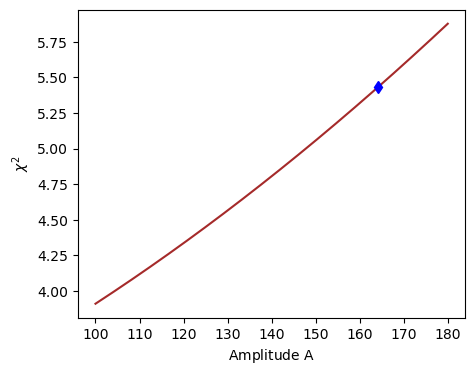

In [44]:
# Plotting chi^2 vs A_sc

plt.figure(figsize=(5,4))

plt.plot(A_sc_vector, chi_vector[:,0], color = "brown", linestyle = "-")

plt.plot(coef_sc[0], chi_stat_sc[0], color = "blue", linestyle = " ", marker = "d") 

plt.xlabel(r"$\text{Amplitude A}$")
plt.ylabel(r"$\chi^2$")

plt.show()

**B_sc (second amplitude)**

In [45]:
B_sc_vector = np.linspace(-200, 0, 1000)

# Empty list
chi_vector_2 = []

for i in range(len(A_sc_vector)):
    chi_vector_2.append(chi_sqr_stat_slevel([
        164.1432413857956,
        B_sc_vector[i],
        0.5275640789434981,
        2.772915725105967,
        0.2715856198059458,
        3.8106682122852384,
        1465.2668576298083
    ]))
#we've fixed the other best fit parammeters while evaluating the vecinity of one

chi_vector_2 = np.array(chi_vector_2)
print(B_sc_vector.shape, chi_vector_2.shape)

(1000,) (1000, 3)


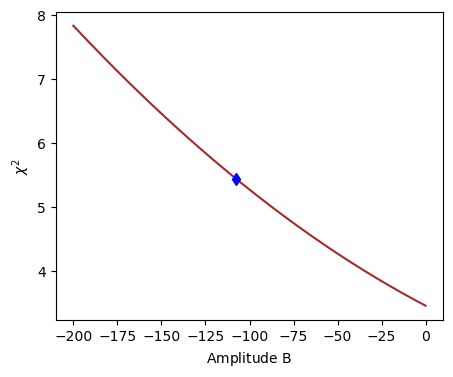

In [46]:
# Plotting chi^2 vs B_sc

plt.figure(figsize=(5,4))

plt.plot(B_sc_vector, chi_vector_2[:,0], color = "brown", linestyle = "-")

plt.plot(coef_sc[1], chi_stat_sc[0], color = "blue", linestyle = " ", marker = "d") 

plt.xlabel(r"$\text{Amplitude B}$")
plt.ylabel(r"$\chi^2$")

plt.show()

**omega_sc_1 (first angular frequency)**

In [47]:
omega_sc_1_vector = np.linspace(-0.6, 0.6, 1000)

# Empty list
chi_vector_3 = []

for i in range(len(omega_sc_1_vector)):
    chi_vector_3.append(chi_sqr_stat_slevel([
        164.1432413857956,
        -107.38778392408773,
        omega_sc_1_vector[i],
        2.772915725105967,
        0.2715856198059458,
        3.8106682122852384,
        1465.2668576298083
    ]))
#we've fixed the other best fit parammeters while evaluating the vecinity of one

chi_vector_3 = np.array(chi_vector_3)
print(omega_sc_1_vector.shape, chi_vector_3.shape)

(1000,) (1000, 3)


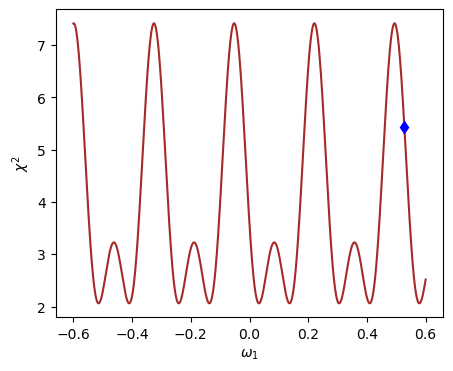

In [48]:
# Plotting chi^2 vs omega_sc_1

plt.figure(figsize=(5,4))

plt.plot(omega_sc_1_vector, chi_vector_3[:,0], color = "brown", linestyle = "-")

plt.plot(coef_sc[2], chi_stat_sc[0], color = "blue", linestyle = " ", marker = "d") 

plt.xlabel(r"$\omega_1$")
plt.ylabel(r"$\chi^2$")

plt.show()

**phi_sc_1 (first phase angle)**

In [49]:
phi_sc_1_vector = np.linspace(0.5, 3.5, 1000)

# Empty list
chi_vector_4 = []

for i in range(len(phi_sc_1_vector)):
    chi_vector_4.append(chi_sqr_stat_slevel([
        164.1432413857956,
        -107.38778392408773,
        0.5275640789434981,
        phi_sc_1_vector[i],
        0.2715856198059458,
        3.8106682122852384,
        1465.2668576298083
    ]))
#we've fixed the other best fit parammeters while evaluating the vecinity of one

chi_vector_4 = np.array(chi_vector_4)
print(phi_sc_1_vector.shape, chi_vector_4.shape)

(1000,) (1000, 3)


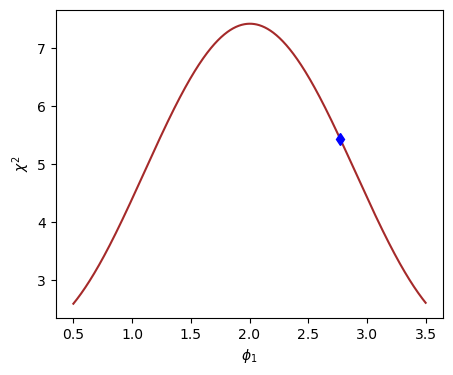

In [50]:
# Plotting chi^2 vs phi_sc_1

plt.figure(figsize=(5,4))

plt.plot(phi_sc_1_vector, chi_vector_4[:,0], color = "brown", linestyle = "-")

plt.plot(coef_sc[3], chi_stat_sc[0], color = "blue", linestyle = " ", marker = "d") 

plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\chi^2$")

plt.show()

**omega_sc_2 (second angular frequency)**

In [51]:
omega_sc_2_vector = np.linspace(-0.6, 0.6, 1000)

# Empty list
chi_vector_5 = []

for i in range(len(omega_sc_2_vector)):
    chi_vector_5.append(chi_sqr_stat_slevel([
        164.1432413857956,
        -107.38778392408773,
        0.5275640789434981,
        2.772915725105967,
        omega_sc_2_vector[i],
        3.8106682122852384,
        1465.2668576298083
    ]))
#we've fixed the other best fit parammeters while evaluating the vecinity of one

chi_vector_5 = np.array(chi_vector_5)
print(omega_sc_2_vector.shape, chi_vector_5.shape)

(1000,) (1000, 3)


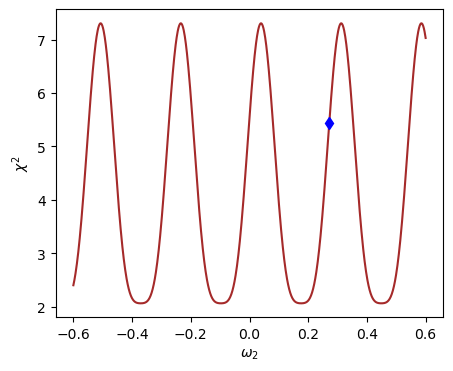

In [52]:
# Plotting chi^2 vs omega_sc_2

plt.figure(figsize=(5,4))

plt.plot(omega_sc_2_vector, chi_vector_5[:,0], color = "brown", linestyle = "-")

plt.plot(coef_sc[4], chi_stat_sc[0], color = "blue", linestyle = " ", marker = "d") 

plt.xlabel(r"$\omega_2$")
plt.ylabel(r"$\chi^2$")

plt.show()

**phi_sc_2 (second phase angle)**

In [53]:
phi_sc_2_vector = np.linspace(0.6, 4.5, 1000)

# Empty list
chi_vector_6 = []

for i in range(len(phi_sc_2_vector)):
    chi_vector_6.append(chi_sqr_stat_slevel([
        164.1432413857956,
        -107.38778392408773,
        0.5275640789434981,
        2.772915725105967,
        0.2715856198059458,
        phi_sc_2_vector[i],
        1465.2668576298083
    ]))
#we've fixed the other best fit parammeters while evaluating the vecinity of one

chi_vector_6 = np.array(chi_vector_6)
print(phi_sc_2_vector.shape, chi_vector_6.shape)

(1000,) (1000, 3)


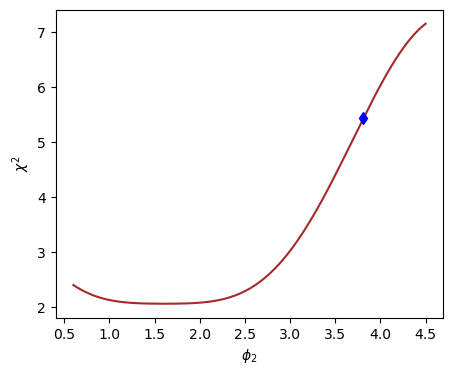

In [54]:
# Plotting chi^2 vs phi_sc_2

plt.figure(figsize=(5,4))

plt.plot(phi_sc_2_vector, chi_vector_6[:,0], color = "brown", linestyle = "-")

plt.plot(coef_sc[5], chi_stat_sc[0], color = "blue", linestyle = " ", marker = "d") 

plt.xlabel(r"$\phi_2$")
plt.ylabel(r"$\chi^2$")

plt.show()

**d_sc (displacement factor)**

In [55]:
d_sc_vector = np.linspace(1300, 1500, 1000)

# Empty list
chi_vector_7 = []

for i in range(len(d_sc_vector)):
    chi_vector_7.append(chi_sqr_stat_slevel([
        164.1432413857956,
        -107.38778392408773,
        0.5275640789434981,
        2.772915725105967,
        0.2715856198059458,
        3.8106682122852384,
        d_sc_vector[i]
    ]))
#we've fixed the other best fit parammeters while evaluating the vecinity of one

chi_vector_7 = np.array(chi_vector_7)
print(d_sc_vector.shape, chi_vector_7.shape)

(1000,) (1000, 3)


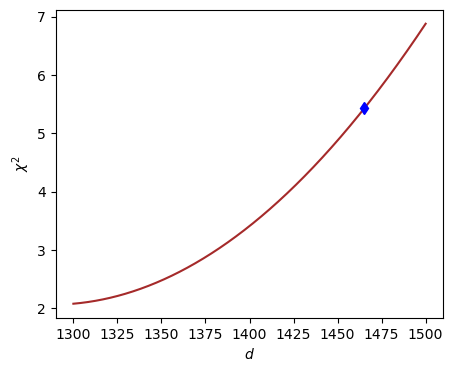

In [56]:
# Plotting chi^2 vs d_sc

plt.figure(figsize=(5,4))

plt.plot(d_sc_vector, chi_vector_7[:,0], color = "brown", linestyle = "-")

plt.plot(coef_sc[6], chi_stat_sc[0], color = "blue", linestyle = " ", marker = "d") 

plt.xlabel(r"$d$")
plt.ylabel(r"$\chi^2$")

plt.show()

Now, we know the range of the vectors for each parammeter. We can now create the 2D meshgrid.

Let's first try the plane formed by $\omega_1$ and $\omega_2$.

In [57]:
omega1_conf_vector = np.linspace(0.4, 0.6, 100)
omega2_conf_vector = np.linspace(0.2, 0.4, 100)

Omega_1, Omega_2 = np.meshgrid(omega1_conf_vector, omega2_conf_vector)
print(Omega_1.shape, Omega_2.shape)

(100, 100) (100, 100)


In [58]:
#We feed the chi_stat, while mantaining the rest of the parammeters fixed
chi_omegas = []
for x in range(0,100):
    for i in range(0,100):
        chi_omegas.append(chi_sqr_stat_slevel([
            164.1432413857956,
            -107.38778392408773,
            Omega_1[i][x],
            2.772915725105967,
            Omega_2[i][x],
            3.8106682122852384,
            1465.2668576298083
        ])[0]) #indexing to just get the chi stat
        
chi_omegas = np.array(chi_omegas)

In [59]:
print(chi_omegas.shape)

new_chi_omega = chi_omegas.reshape(100, 100)
print(new_chi_omega.shape)

(10000,)
(100, 100)


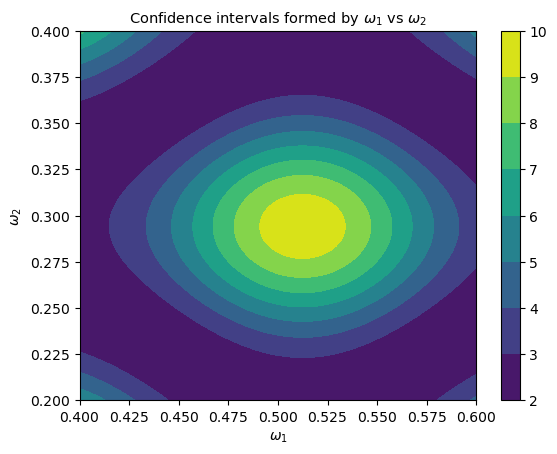

In [60]:
plt.figure()

omegas_conf = plt.contourf(Omega_1, Omega_2, new_chi_omega, cmap = "viridis")
plt.colorbar(omegas_conf)

# Axes labels
plt.title("Confidence intervals formed by $\omega_1$ vs $\omega_2$", fontsize=10.5)
plt.xlabel(r"$\omega_1$")
plt.ylabel(r"$\omega_2$")

#Show plot
plt.show()
plt.close()

Let's now try the plane formed by $\phi_1$ and $\phi_2$. 

In [61]:
phi1_conf_vector = np.linspace(2.5, 3.0, 100)
phi2_conf_vector = np.linspace(3.6, 6.2, 100)

Chi_1, Chi_2 = np.meshgrid(phi1_conf_vector, phi2_conf_vector)
print(Chi_1.shape, Chi_2.shape)

(100, 100) (100, 100)


In [62]:
#We feed the chi_stat, while mantaining the rest of the parammeters fixed
chi_phis = []
for x in range(0,100):
    for i in range(0,100):
        chi_phis.append(chi_sqr_stat_slevel([
            164.1432413857956,
            -107.38778392408773,
            0.5275640789434981,
            Chi_1[i][x],
            0.2715856198059458,
            Chi_2[i][x],
            1465.2668576298083
        ])[0])
chi_phis = np.array(chi_phis)

In [63]:
print(chi_phis.shape)

new_chi_phi = chi_phis.reshape(100, 100)
print(new_chi_phi.shape)

(10000,)
(100, 100)


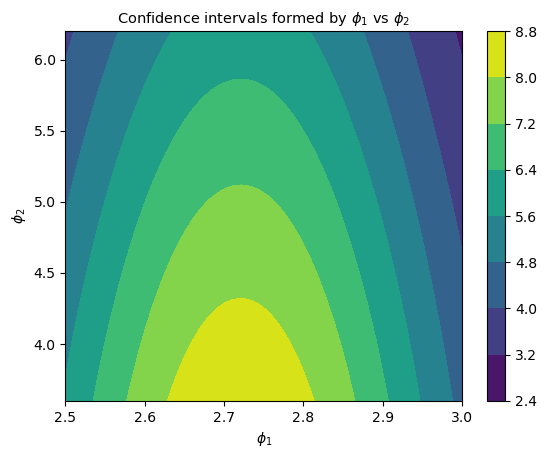

In [64]:
plt.figure()

phis_conf = plt.contourf(Chi_1, Chi_2, new_chi_phi, cmap = "viridis")
plt.colorbar(phis_conf)

# Axes labels
plt.title("Confidence intervals formed by $\phi_1$ vs $\phi_2$", fontsize=10.5)
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")

#Show plot
plt.show()
plt.close()

Let's now try the plane formed by the amplitudes $A$ and $B$. 

In [65]:
A_conf_vector = np.linspace(162, 168, 1000)
B_conf_vector = np.linspace(-120, -100, 1000)

A_1, B_1 = np.meshgrid(A_conf_vector, B_conf_vector)
print(A_1.shape, B_1.shape)

(1000, 1000) (1000, 1000)


In [66]:
#We feed the chi_stat, while mantaining the rest of the parammeters fixed
chi_amplitudes = []
for x in range(0,1000):
    for i in range(0,1000):
        chi_amplitudes.append(chi_sqr_stat_slevel([
            A_1[i][x],
            B_1[i][x],
            0.5275640789434981,
            2.772915725105967,
            0.2715856198059458,
            3.8106682122852384,
            1465.2668576298083
        ])[0])
chi_amplitudes = np.array(chi_amplitudes)

In [67]:
print(chi_amplitudes.shape)

new_chi_amps = chi_amplitudes.reshape(1000, 1000)
print(new_chi_amps.shape)

(1000000,)
(1000, 1000)


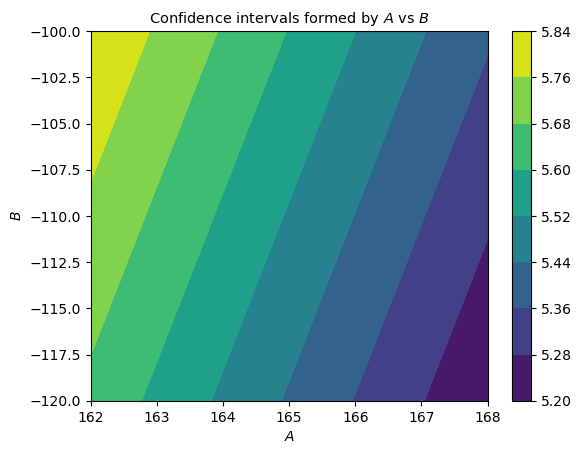

In [68]:
plt.figure()

amps_conf = plt.contourf(A_1, B_1, new_chi_amps, cmap = "viridis")
plt.colorbar(amps_conf)

# Axes labels
plt.title("Confidence intervals formed by $A$ vs $B$", fontsize=10.5)
plt.xlabel(r"$A$")
plt.ylabel(r"$B$")

#Show plot
plt.show()
plt.close()

Finally, we can try the plane formed by the displacement and one of the amplitudes.

In [69]:
A2_conf_vector = np.linspace(150, 170, 100)
d_conf_vector = np.linspace(1450, 1480, 100)

A_2, D_1 = np.meshgrid(A2_conf_vector, d_conf_vector)
print(A_2.shape, D_1.shape)

(100, 100) (100, 100)


In [70]:
#We feed the chi_stat, while mantaining the rest of the parammeters fixed
chi_disp = []
for x in range(0,100):
    for i in range(0,100):
        chi_disp.append(chi_sqr_stat_slevel([
            A_2[i][x],
            -107.38778392408773,
            0.5275640789434981,
            2.772915725105967,
            0.2715856198059458,
            3.8106682122852384,
            D_1[i][x]
        ])[0])
chi_disp = np.array(chi_disp)

In [71]:
print(chi_disp.shape)

new_chi_disp = chi_disp.reshape(100, 100)
print(new_chi_disp.shape)

(10000,)
(100, 100)


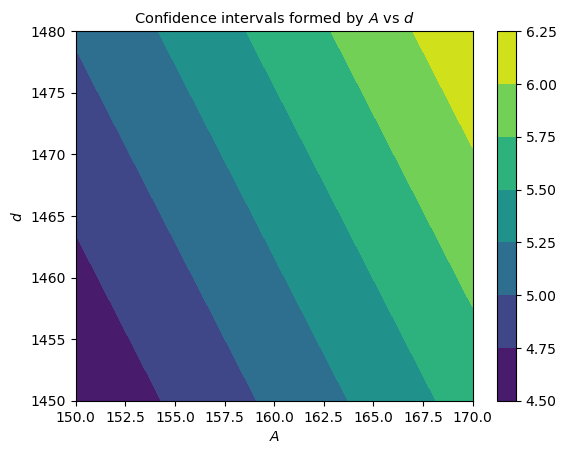

In [72]:
plt.figure()

disp_conf = plt.contourf(A_2, D_1, new_chi_disp, cmap = "viridis")
plt.colorbar(disp_conf)

# Axes labels
plt.title("Confidence intervals formed by $A$ vs $d$", fontsize=10.5)
plt.xlabel(r"$A$")
plt.ylabel(r"$d$")

#Show plot
plt.show()
plt.close()

### Analysis questions:

#### (i) Based on the fitted function, what period does the tide in Santa Cruz have? What do the confidence intervals tell us?

The period can be computed as $T = 2 \pi / \omega$. Since my fitted function has two sinusoidal functions, let's first find the period for each angular frequency.

In [73]:
T_1 = 2*np.pi/coef_sc[2]
T_2 = 2*np.pi/coef_sc[4]
print(f"The first period is: {T_1:.2f} [hours]")
print("\n")
print(f"The second period is: {T_2:.2f} [hours]")

The first period is: 11.91 [hours]


The second period is: 23.14 [hours]


Since our model is a sum of sinusoidal functions, we use the period of the dominant sub-function, i.e, the one with the greater amplitude. The other sub-function is just adding harmonic noise to improve the fitting. Thus, the period of the tide at Santa Cruz is of approximately 12 hours.

On the other hand, the confidence intervals tell us the regions where the parameter combinations become statistically compatible with the data such that the $\chi²$ statistic is minimized.

#### (j) Can the same model be applied to the other 2 stations (Baltra and La Libertad)? If not, report appropriate best-fit functions for these stations too.

Let's first get the average measurements of sea level for Baltra and La Libertad.

In [74]:
#Rename the hours and slevels cleaned arrays
b_hours_cleaned = baltra_cleaned[0,:]
b_slevel_cleaned = baltra_cleaned[1,:]

# print(b_slevel_cleaned.size, b_hours_cleaned.size)

In [75]:
#Rename the hours and slevels cleaned arrays
ll_hours_cleaned = la_libertad_cleaned[0,:]
ll_slevel_cleaned = la_libertad_cleaned[1,:]

# print(ll_slevel_cleaned.size, ll_hours_cleaned.size)

Then, we calculate the average sea level vs hour.

In [76]:
av_slevel_hour_b = []
stdv_slvel_hour_b = []

for hour in range(24): #iterate over each hour
    index_average = (b_hours_cleaned == hour) #collect all the measurements at each hour, this is our index
    avg_b = np.mean(b_slevel_cleaned[index_average]) #find the mean of all the measurements at each hour
    stdv_b = np.std(b_slevel_cleaned[index_average]) #find the standard deviation of all the measurements at each hour
    av_slevel_hour_b.append(avg_b) #store the means inside a list
    stdv_slvel_hour_b.append(stdv_b) #store the stdvs inside a list

av_slevel_hour_b = np.array(av_slevel_hour_b) #convert to an array
stdv_slvel_hour_b = np.array(stdv_slvel_hour_b) #convert to an array

# print(av_slevel_hour_b.size)
# print(stdv_slvel_hour_b.size)

In [77]:
av_slevel_hour_ll = []
stdv_slvel_hour_ll = []

for hour in range(24): #iterate over each hour
    index_average = (ll_hours_cleaned == hour) #collect all the measurements at each hour, this is our index
    avg_ll = np.mean(ll_slevel_cleaned[index_average]) #find the mean of all the measurements at each hour
    stdv_ll = np.std(ll_slevel_cleaned[index_average]) #find the standard deviation of all the measurements at each hour
    av_slevel_hour_ll.append(avg_ll) #store the means inside a list
    stdv_slvel_hour_ll.append(stdv_ll) #store the stdvs inside a list

av_slevel_hour_ll = np.array(av_slevel_hour_ll) #convert to an array
stdv_slvel_hour_ll = np.array(stdv_slvel_hour_ll) #convert to an array

# print(av_slevel_hour_ll.size)
# print(stdv_slvel_hour_ll.size)

Now, let's plot.

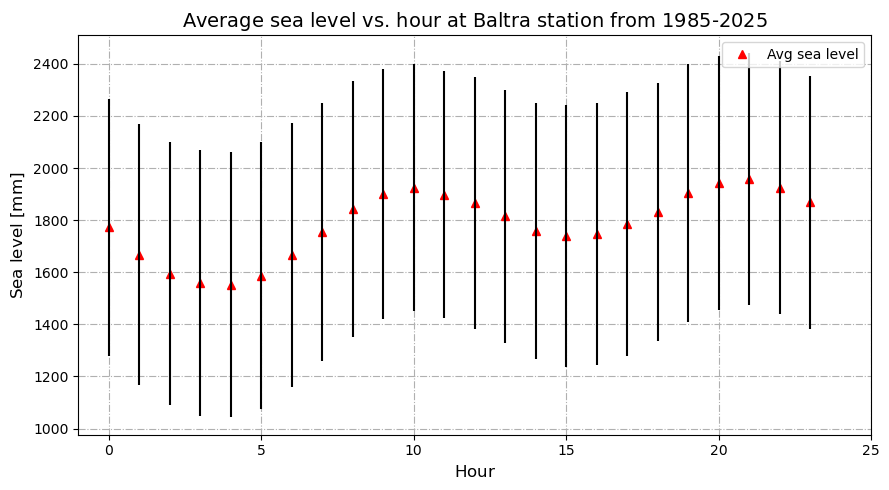

In [78]:
#Plotting the average sea level vs hour for Baltra
plt.figure(figsize=(9, 5))

plt.plot(hours_daily, av_slevel_hour_b, color="red", linestyle="", marker="^", label="Avg sea level")
plt.errorbar(hours_daily,  av_slevel_hour_b, yerr = stdv_slvel_hour_b, linestyle = " ", color = "black")


plt.title(r"$\text{Average sea level vs. hour at Baltra station from 1985-2025}$", fontsize=14)
plt.xlabel(r"$\text{Hour}$", fontsize=12)
plt.ylabel(r"$\text{Sea level [mm]}$", fontsize=12)


plt.xlim(-1, 25)
plt.grid(linestyle = '-.')
plt.tight_layout()
plt.legend()

plt.show()
plt.close()

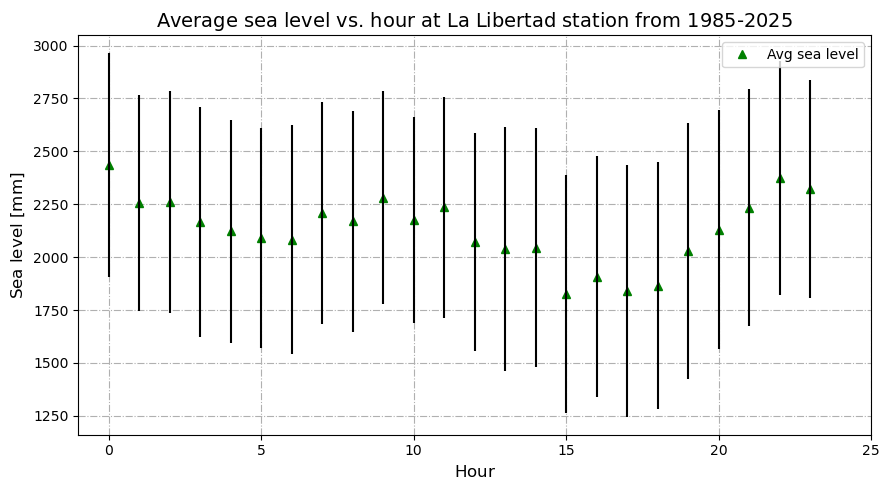

In [79]:
#Plotting the average sea level vs hour for La Libertad
plt.figure(figsize=(9, 5))

plt.plot(hours_daily, av_slevel_hour_ll, color="green", linestyle="", marker="^", label="Avg sea level")
plt.errorbar(hours_daily,  av_slevel_hour_ll, yerr = stdv_slvel_hour_ll, linestyle = " ", color = "black")


plt.title(r"$\text{Average sea level vs. hour at La Libertad station from 1985-2025}$", fontsize=14)
plt.xlabel(r"$\text{Hour}$", fontsize=12)
plt.ylabel(r"$\text{Sea level [mm]}$", fontsize=12)


plt.xlim(-1, 25)
plt.grid(linestyle = '-.')
plt.tight_layout()
plt.legend()

plt.show()
plt.close()

Now, we can try out our proposed model for this stations too.

**Baltra**

In [80]:
# Using the LM method (with sigmas and an ansatz)

coef_b, cova_b = opt.curve_fit(fit_slevel, hours_daily, av_slevel_hour_b, \
                                p0 = [200., 150., 0.2*np.pi, 0.7*np.pi, 0., 0.2*np.pi, 100], sigma = stdv_slvel_hour_b)
print("Best-fit parameters", coef_b)

print("Associate uncertainties:", np.sqrt(np.diag(cova_b)))

Best-fit parameters [ 1.44368420e+02  9.78591421e+01  5.21743107e-01  2.93675077e+00
  2.61557117e-01 -2.65497715e+00  1.78586990e+03]
Associate uncertainties: [3.18301101 2.46937122 0.00441363 0.06400957 0.00827536 0.12493758
 1.91775515]


In [81]:
fitted_slevel_b = fit_slevel(hours_daily,*coef_b) #evaluate the coefficients in our model

uncert_fit_sc = np.sqrt(np.diag(cova_b))

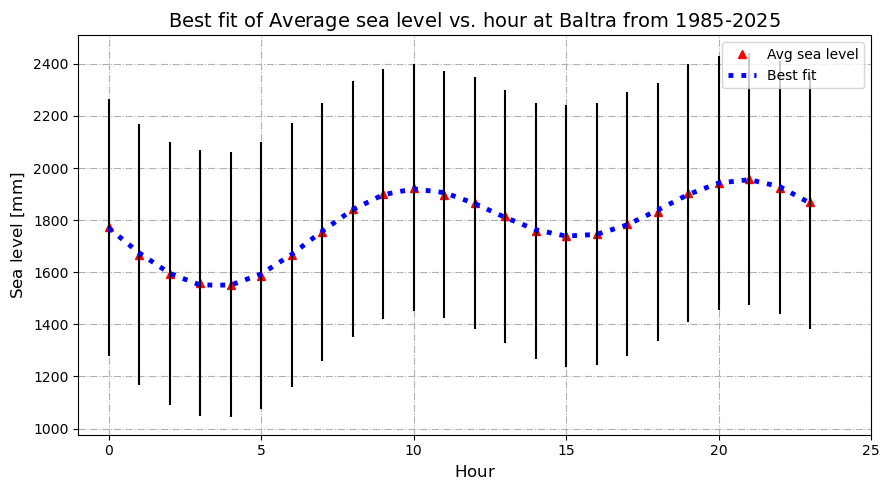

In [82]:
#Plot the fitting and the data
plt.figure(figsize=(9, 5))

plt.plot(hours_daily, av_slevel_hour_b, color="red", linestyle="", marker="^", label="Avg sea level")
plt.errorbar(hours_daily,  av_slevel_hour_b, yerr = stdv_slvel_hour_b, linestyle = " ", color = "black")
plt.plot(hours_daily, fitted_slevel_b , color="blue", linestyle = ":", linewidth = 3.5, label="Best fit") #add model as label


plt.title(r"$\text{Best fit of Average sea level vs. hour at Baltra from 1985-2025}$", fontsize=14)
plt.xlabel(r"$\text{Hour}$", fontsize=12)
plt.ylabel(r"$\text{Sea level [mm]}$", fontsize=12)


plt.xlim(-1, 25)
plt.grid(linestyle = '-.')
plt.tight_layout()
plt.legend()

plt.show()
plt.close()

**La Libertad**

In [83]:
# Using the LM method (with sigmas and an ansatz)

coef_ll, cova_ll = opt.curve_fit(fit_slevel, hours_daily, av_slevel_hour_ll, \
                                p0 = [200., 150., 0.2*np.pi, 0.7*np.pi, 0., 0.2*np.pi, 100], sigma = stdv_slvel_hour_ll)
print("Best-fit parameters", coef_ll)

print("Associate uncertainties:", np.sqrt(np.diag(cova_ll)))

Best-fit parameters [ 1.59778672e+02  1.67121947e+02  5.01203705e-01  2.70004295e+00
 -2.12852906e-01  7.80845458e+00  2.16586515e+03]
Associate uncertainties: [1.57415017e+01 4.25351860e+01 2.84123668e-02 4.12866688e-01
 5.49631011e-02 8.57294395e-01 5.41215919e+01]


In [84]:
fitted_slevel_ll = fit_slevel(hours_daily,*coef_ll) #evaluate the coefficients in our model

uncert_fit_ll = np.sqrt(np.diag(cova_ll))

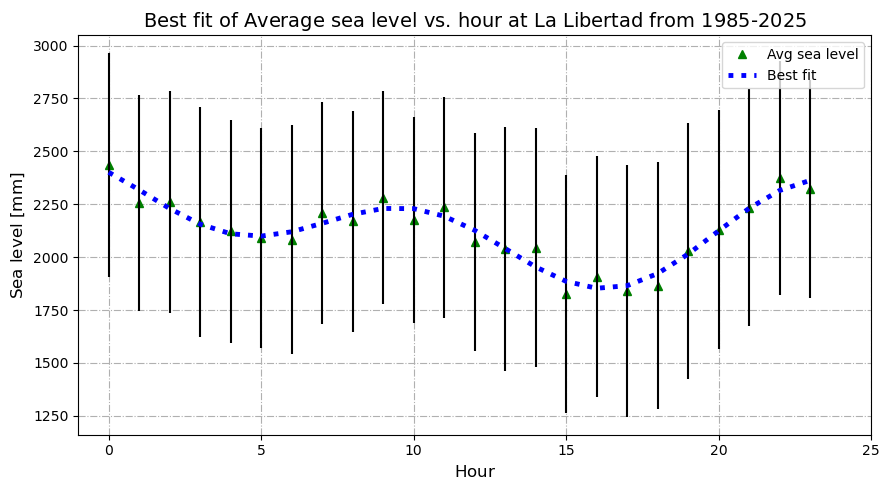

In [85]:
#Plot the fitting and the data
plt.figure(figsize=(9, 5))

plt.plot(hours_daily, av_slevel_hour_ll, color="green", linestyle="", marker="^", label="Avg sea level")
plt.errorbar(hours_daily,  av_slevel_hour_ll, yerr = stdv_slvel_hour_ll, linestyle = " ", color = "black")
plt.plot(hours_daily, fitted_slevel_ll , color="blue", linestyle = ":", linewidth = 3.5, label="Best fit") #add model as label


plt.title(r"$\text{Best fit of Average sea level vs. hour at La Libertad from 1985-2025}$", fontsize=14)
plt.xlabel(r"$\text{Hour}$", fontsize=12)
plt.ylabel(r"$\text{Sea level [mm]}$", fontsize=12)


plt.xlim(-1, 25)
plt.grid(linestyle = '-.')
plt.tight_layout()
plt.legend()

plt.show()
plt.close()

Thus, the model can be applied to all the stations.